<a href="https://colab.research.google.com/github/ViniciusKanh/NeuroScanAI_Deteccao_Tumor_por_Imagem/blob/main/NeuroScanAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# NeuroScanAI: Detecção de Tumores Cerebrais com PyTorch

## Introdução

O projeto NeuroScanAI tem como objetivo desenvolver um sistema automatizado para a detecção de tumores cerebrais usando imagens médicas. A relevância deste projeto reside na capacidade de auxiliar profissionais da saúde no diagnóstico preciso e rápido de tumores cerebrais, uma condição médica que requer tratamento imediato e eficaz para melhores resultados. Utilizando técnicas de aprendizado de máquina e processamento de imagens, este projeto visa melhorar as taxas de detecção precoce de tumores, potencialmente e melhorando a qualidade de vida dos pacientes.

## Materiais e Métodos

**Conjunto de Dados**
Os dados utilizados neste projeto consistem em imagens de ressonância magnética (MRI) do cérebro, coletadas de várias fontes confiáveis, que incluem imagens tanto de cérebros saudáveis quanto de cérebros com tumores. As imagens são pré-processadas e normalizadas para garantir a consistência dos dados.

**Ferramentas e Tecnologias**
O projeto é desenvolvido utilizando o Google Colab, que oferece um ambiente de codificação baseado em nuvem com acesso a GPUs, facilitando o treinamento de modelos de aprendizado profundo. A principal biblioteca utilizada é o PyTorch, uma framework de aprendizado de máquina que oferece ampla flexibilidade e eficiência no treinamento de redes neurais. Além disso, a biblioteca timm é usada para acessar modelos pré-treinados, que servem como ponto de partida para o treinamento.

**Preparação de Dados**
O conjunto de dados é dividido em três partes: treinamento, validação e teste, com uma proporção padrão de 80:10:10. As imagens são redimensionadas e normalizadas usando transformações específicas para garantir que o modelo receba dados consistentes. Uma classe personalizada CustomDataset é implementada para gerenciar o carregamento e a transformação das imagens.

**Modelo de Rede Neural**
O modelo escolhido para este projeto é o rexnet_200, um modelo de rede neural convolucional conhecido por seu desempenho robusto em tarefas de classificação de imagens. O modelo é adaptado para o contexto específico de detecção de tumores cerebrais e treinado com o conjunto de dados preparado.

**Treinamento e Validação**
O modelo é treinado usando um conjunto de dados de treinamento e sua performance é avaliada periodicamente no conjunto de validação. O treinamento é conduzido por várias épocas, e o desempenho do modelo é monitorado para evitar o sobreajuste. A função de perda CrossEntropyLoss e o otimizador Adam são utilizados.

**Inferência e Avaliação**
Após o treinamento, o modelo é testado no conjunto de dados de teste para avaliar sua capacidade de generalização. A acurácia, junto com outras métricas relevantes, é calculada para quantificar o desempenho do modelo.

## Configuração Inicial

### Montando Estrutura no Google Drive

```python
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
```

### Importando Bibliotecas

```python
import os
import torch
import shutil
import numpy as np
from glob import glob
from PIL import Image
from torch.utils.data import random_split, Dataset, DataLoader
torch.manual_seed(1)
```

## Construção do Dataset Personalizado

```python
class CustomDataset(Dataset):
    # Implementação da classe CustomDataset
```

## Pré-processamento e Divisão do Dataset

```python
from torchvision import transforms as T

def get_dls(root, transformations, bs, split=[0.8, 0.1, 0.1], ns=4):
    # Implementação da função get_dls
```

## Visualização de Dados

```python
import random
from matplotlib import pyplot as plt

def tensor_2_im(t, t_type="rgb"):
    # Implementação da função tensor_2_im

def visualize(data, n_ims, rows, cmap=None, cls_names=None):
    # Implementação da função visualize
```

## Construção e Treinamento do Modelo

```python
!pip install timm

import timm

def train_setup(m):
    # Implementação da função train_setup

def train_model(m, epochs, device, loss_fn, optimizer, tr_dl, val_dl):
    # Implementação da função train_model
```

## Inferência e Avaliação do Modelo

```python
def inference(model, device, test_dl, num_ims, row, cls_names=None):
    # Implementação da função inference
```

## Conclusão

Este projeto apresenta uma abordagem inovadora e eficiente para a detecção de tumores cerebrais usando redes neurais convolucionais. A aplicação deste modelo pode ser significativa no auxílio ao diagnóstico precoce, melhorando as taxas de sucesso no tratamento de tumores cerebrais.


## Montando Estrtutura no Google Driver

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Importando Biblioteca

In [2]:
import os, torch, shutil, numpy as np
from glob import glob; from PIL import Image
from torch.utils.data import random_split, Dataset, DataLoader
torch.manual_seed(1)

In [3]:
class CustomDataset(Dataset):

    def __init__(self, root, transformations = None):

        self.transformations = transformations
        self.im_paths = [im_path for im_path in sorted(glob(f"{root}/*/*")) if "jpg" in im_path]

        self.cls_names, self.cls_counts, count, data_count = {}, {}, 0, 0
        for idx, im_path in enumerate(self.im_paths):
            class_name = self.get_class(im_path)
            if class_name not in self.cls_names: self.cls_names[class_name] = count; self.cls_counts[class_name] = 1; count += 1
            else: self.cls_counts[class_name] += 1

    def get_class(self, path): return os.path.dirname(path).split("/")[-1]

    def __len__(self): return len(self.im_paths)

    def __getitem__(self, idx):

        im_path = self.im_paths[idx]
        im = Image.open(im_path)
        gt = self.cls_names[self.get_class(im_path)]

        if self.transformations is not None: im = self.transformations(im)

        return im, gt

In [4]:
from torchvision import transforms as T

def get_dls(root, transformations, bs, split = [0.8, 0.1, 0.1], ns = 4):

    ds = CustomDataset(root = root, transformations = transformations)

    all_len = len(ds)
    tr_len = int(all_len * split[0]); val_len = int(all_len * split[1]); ts_len = all_len - tr_len - val_len
    tr_ds, val_ds, ts_ds = random_split(dataset = ds, lengths = [tr_len, val_len, ts_len])

    tr_dl, val_dl, ts_dl = DataLoader(tr_ds, batch_size = bs, shuffle = True, num_workers = ns), DataLoader(val_ds, batch_size = bs, shuffle = False, num_workers = ns), DataLoader(ts_ds, batch_size = 1, shuffle = False, num_workers = ns)

    return tr_dl, val_dl, ts_dl, ds.cls_names

In [5]:
root = "/content/drive/My Drive/0-Dataset/brain-tumors-256x256/Data"
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
tfs = T.Compose([T.Resize((224, 224)), T.ToTensor(), T.Normalize(mean = mean, std = std)])
tr_dl, val_dl, ts_dl, classes = get_dls(root = root, transformations = tfs, bs = 64)

print(len(tr_dl)); print(len(val_dl)); print(len(ts_dl)); print(classes)

39
5
311
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'normal': 2, 'pituitary_tumor': 3}


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Visualization

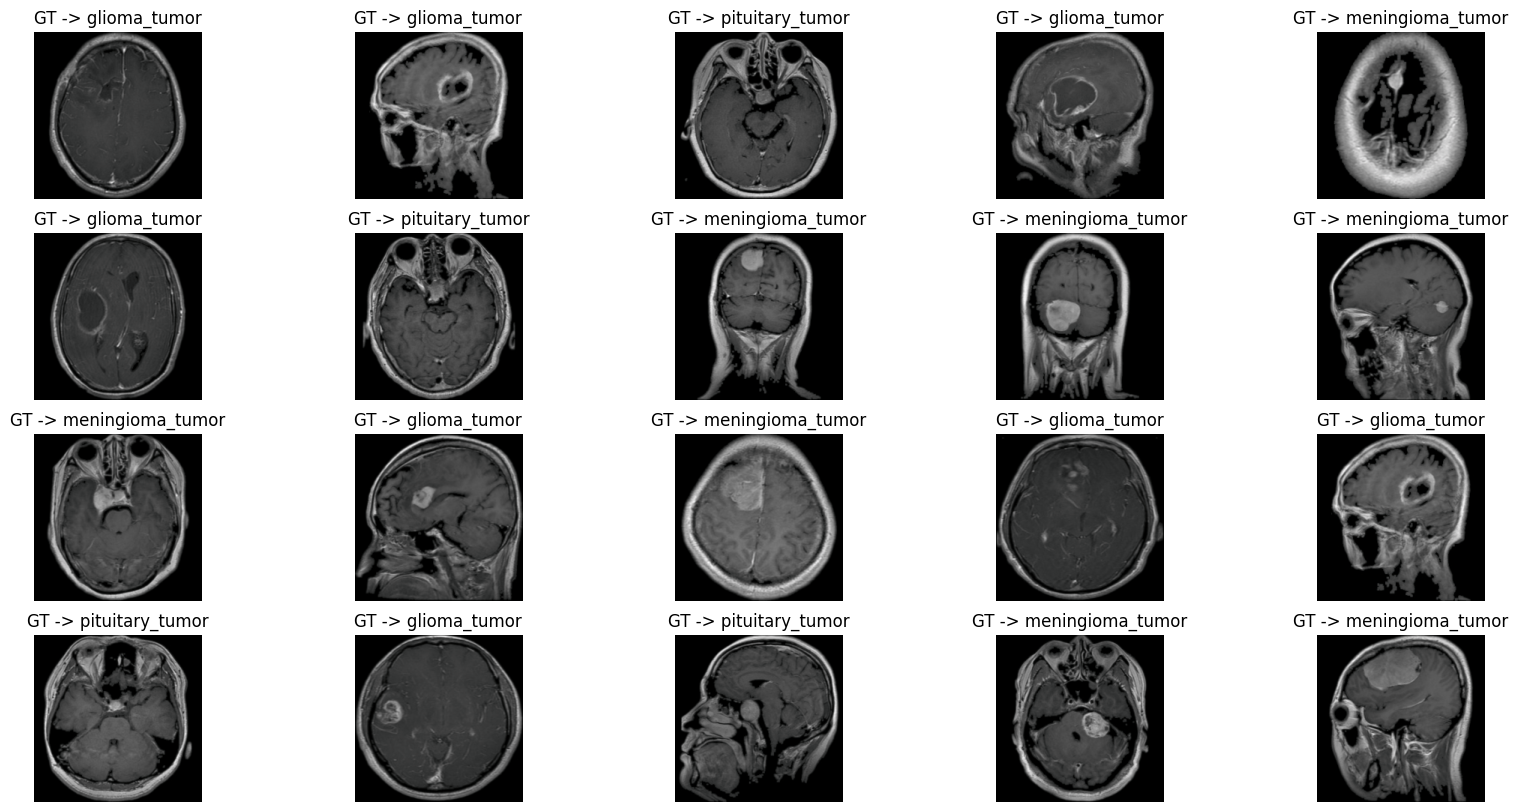

In [ ]:
import random
from matplotlib import pyplot as plt

def tensor_2_im(t, t_type = "rgb"):

    gray_tfs = T.Compose([T.Normalize(mean = [ 0.], std = [1/0.5]), T.Normalize(mean = [-0.5], std = [1])])
    rgb_tfs = T.Compose([T.Normalize(mean = [ 0., 0., 0. ], std = [ 1/0.229, 1/0.224, 1/0.225 ]), T.Normalize(mean = [ -0.485, -0.456, -0.406 ], std = [ 1., 1., 1. ])])

    invTrans = gray_tfs if t_type == "gray" else rgb_tfs

    return (invTrans(t) * 255).detach().squeeze().cpu().permute(1,2,0).numpy().astype(np.uint8) if t_type == "gray" else (invTrans(t) * 255).detach().cpu().permute(1,2,0).numpy().astype(np.uint8)

def visualize(data, n_ims, rows, cmap = None, cls_names = None):

    assert cmap in ["rgb", "gray"], "Rasmni oq-qora yoki rangli ekanini aniqlashtirib bering!"
    if cmap == "rgb": cmap = "viridis"

    plt.figure(figsize = (20, 10))
    indekslar = [random.randint(0, len(data) - 1) for _ in range(n_ims)]
    for idx, indeks in enumerate(indekslar):

        im, gt = data[indeks]
        # Start plot
        plt.subplot(rows, n_ims // rows, idx + 1)
        if cmap: plt.imshow(tensor_2_im(im, cmap), cmap=cmap)
        else: plt.imshow(tensor_2_im(im))
        plt.axis('off')
        if cls_names is not None: plt.title(f"GT -> {cls_names[int(gt)]}")
        else: plt.title(f"GT -> {gt}")

visualize(tr_dl.dataset, 20, 4, "rgb", list(classes.keys()))

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.6 MB/s eta 0:00:00


In [ ]:
import timm
m = timm.create_model("rexnet_200", pretrained = True, num_classes = len(classes))
def train_setup(m): return m.to("cuda"), 15, "cuda", torch.nn.CrossEntropyLoss(), torch.optim.Adam(params = m.parameters(), lr = 3e-4)
m, epochs, device, loss_fn, optimizer = train_setup(m)

model.safetensors:   0%|          | 0.00/65.8M [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm

print("Start training...")
best_acc, best_loss, threshold = 0, float("inf"), 0.01

for epoch in range(epochs):

    epoch_loss, epoch_acc, total = 0, 0, 0
    for idx, batch in tqdm(enumerate(tr_dl)):
        ims, gts = batch
        ims, gts = ims.to(device), gts.to(device)

        total += ims.shape[0]

        preds = m(ims)

        pred_cls = torch.argmax(preds.data, dim = 1)

        loss = loss_fn(preds, gts)

        epoch_acc += (pred_cls == gts).sum().item()

        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"{epoch + 1}-epoch train process is completed!")
    print(f"{epoch + 1}-epoch train loss -> {(epoch_loss / len(tr_dl)):.3f}")
    print(f"{epoch + 1}-epoch train accuracy -> {(epoch_acc / total):.3f}")

    m.eval()
    with torch.no_grad():
        val_epoch_loss, val_epoch_acc, val_total = 0, 0, 0
        for idx, batch in enumerate(val_dl):
            ims, gts = batch
            ims, gts = ims.to(device), gts.to(device)
            val_total += ims.shape[0]

            preds = m(ims)
            loss = loss_fn(preds, gts)
            _, pred_cls = torch.max(preds.data, dim = 1)
            val_epoch_acc += (pred_cls == gts).sum().item()
            val_epoch_loss += loss.item()

        val_acc = val_epoch_acc / val_total
        val_loss = val_epoch_loss / len(val_dl)
        print(f"{epoch + 1}-epoch validation process is completed!")

        print(f"{epoch + 1}-epoch validation loss -> {val_loss:.3f}")
        print(f"{epoch + 1}-epoch validation accuracy -> {val_acc:.3f}")

        # if val_acc > best_acc:
        if val_loss < (best_loss + threshold):
            os.makedirs("saved_models", exist_ok=True)
            # best_acc = val_acc
            best_loss = val_loss
            torch.save(m.state_dict(), f"/content/drive/My Drive/0-Dataset/brain-tumors-256x256/1-Modeloss/new_brain_best_model.pth")

Start training...


39it [01:55,  2.95s/it]

1-epoch train process is completed!
1-epoch train loss -> 0.946
1-epoch train accuracy -> 0.786


1-epoch validation process is completed!
1-epoch validation loss -> 0.517
1-epoch validation accuracy -> 0.841


39it [00:24,  1.58it/s]

2-epoch train process is completed!
2-epoch train loss -> 1.441
2-epoch train accuracy -> 0.488


2-epoch validation process is completed!
2-epoch validation loss -> 1.372
2-epoch validation accuracy -> 0.346


39it [00:24,  1.61it/s]

3-epoch train process is completed!
3-epoch train loss -> 1.266
3-epoch train accuracy -> 0.376


3-epoch validation process is completed!
3-epoch validation loss -> 1.090
3-epoch validation accuracy -> 0.492


39it [00:24,  1.59it/s]

4-epoch train process is completed!
4-epoch train loss -> 0.946
4-epoch train accuracy -> 0.575


4-epoch validation process is completed!
4-epoch validation loss -> 0.735
4-epoch validation accuracy -> 0.715


39it [00:23,  1.63it/s]

5-epoch train process is completed!
5-epoch train loss -> 0.812
5-epoch train accuracy -> 0.654


5-epoch validation process is completed!
5-epoch validation loss -> 0.908
5-epoch validation accuracy -> 0.621


39it [00:24,  1.59it/s]

6-epoch train process is completed!
6-epoch train loss -> 0.563
6-epoch train accuracy -> 0.789


6-epoch validation process is completed!
6-epoch validation loss -> 0.960
6-epoch validation accuracy -> 0.680


39it [00:24,  1.62it/s]

7-epoch train process is completed!
7-epoch train loss -> 0.454
7-epoch train accuracy -> 0.820


7-epoch validation process is completed!
7-epoch validation loss -> 0.552
7-epoch validation accuracy -> 0.816


39it [00:24,  1.61it/s]

8-epoch train process is completed!
8-epoch train loss -> 0.399
8-epoch train accuracy -> 0.846


8-epoch validation process is completed!
8-epoch validation loss -> 0.476
8-epoch validation accuracy -> 0.812


39it [00:24,  1.62it/s]

9-epoch train process is completed!
9-epoch train loss -> 0.378
9-epoch train accuracy -> 0.853


9-epoch validation process is completed!
9-epoch validation loss -> 0.396
9-epoch validation accuracy -> 0.838


39it [00:24,  1.62it/s]

10-epoch train process is completed!
10-epoch train loss -> 0.262
10-epoch train accuracy -> 0.898


10-epoch validation process is completed!
10-epoch validation loss -> 0.297
10-epoch validation accuracy -> 0.880


39it [00:23,  1.63it/s]

11-epoch train process is completed!
11-epoch train loss -> 0.220
11-epoch train accuracy -> 0.922


11-epoch validation process is completed!
11-epoch validation loss -> 0.308
11-epoch validation accuracy -> 0.896


39it [00:23,  1.63it/s]

12-epoch train process is completed!
12-epoch train loss -> 0.190
12-epoch train accuracy -> 0.932


12-epoch validation process is completed!
12-epoch validation loss -> 0.269
12-epoch validation accuracy -> 0.896


39it [00:24,  1.61it/s]

13-epoch train process is completed!
13-epoch train loss -> 0.171
13-epoch train accuracy -> 0.937


13-epoch validation process is completed!
13-epoch validation loss -> 0.245
13-epoch validation accuracy -> 0.919


39it [00:23,  1.63it/s]

14-epoch train process is completed!
14-epoch train loss -> 0.099
14-epoch train accuracy -> 0.967


14-epoch validation process is completed!
14-epoch validation loss -> 0.151
14-epoch validation accuracy -> 0.964


39it [00:24,  1.62it/s]

15-epoch train process is completed!
15-epoch train loss -> 0.065
15-epoch train accuracy -> 0.977


15-epoch validation process is completed!
15-epoch validation loss -> 0.326
15-epoch validation accuracy -> 0.906


Accuracy of the model on the test data -> 0.952


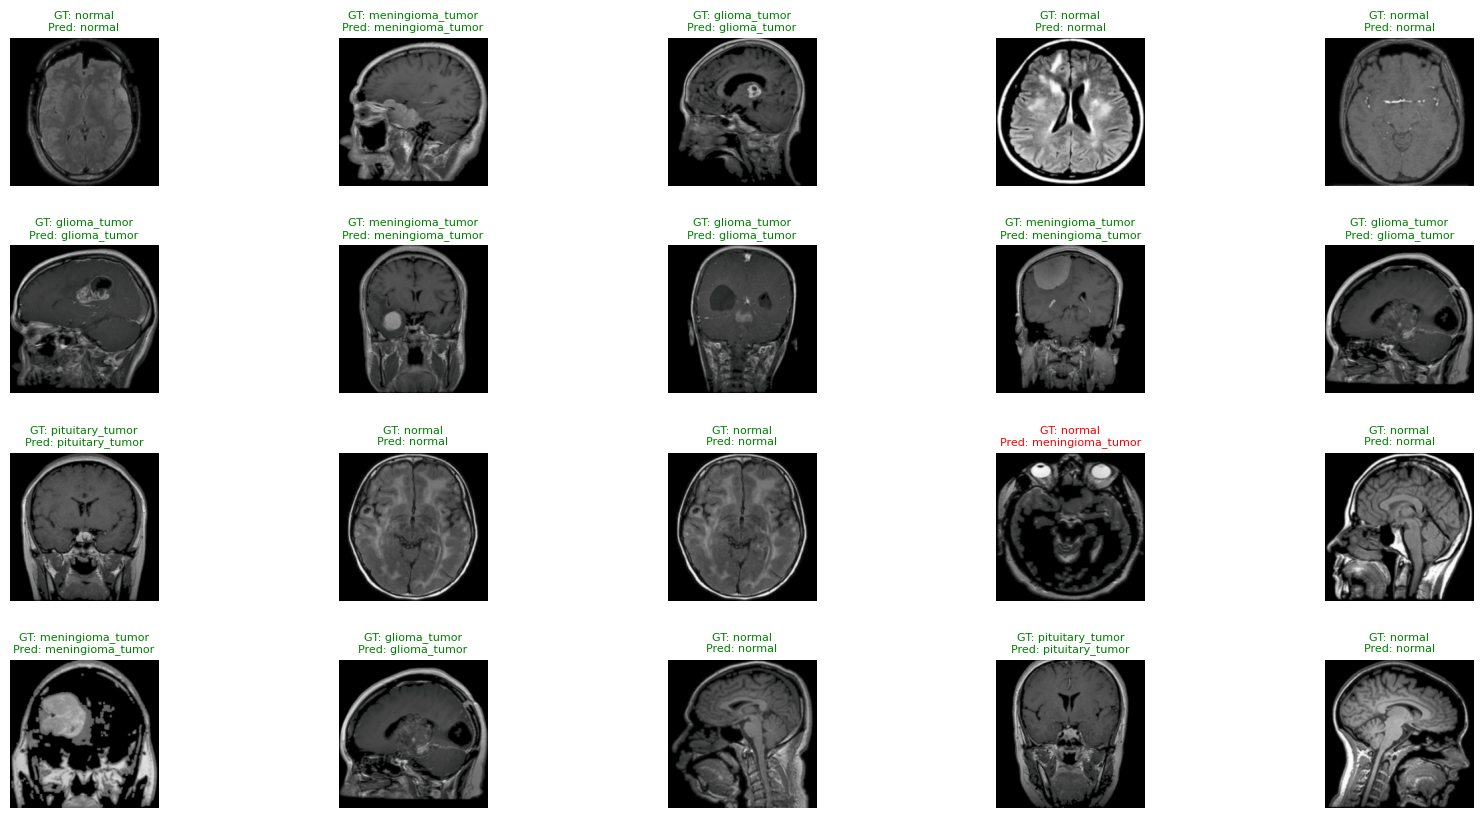

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
from torchvision import transforms as T

def inference(model, device, test_dl, num_ims, row, cls_names=None):

    acc = 0
    preds, images, lbls = [], [], []
    for idx, data in enumerate(test_dl):
        im, gt = data
        im, gt = im.to(device), gt.to(device)
        pred_class = torch.argmax(model(im), dim=1)
        acc += (pred_class == gt).sum().item()
        images.append(im)
        preds.append(pred_class.item())
        lbls.append(gt.item())

    print(f"Accuracy of the model on the test data -> {(acc / len(test_dl.dataset)):.3f}")

    fig, axes = plt.subplots(row, num_ims // row, figsize=(20, 10))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    indekslar = [random.randint(0, len(images) - 1) for _ in range(num_ims)]
    for idx, indeks in enumerate(indekslar):
        ax = axes[idx // (num_ims // row), idx % (num_ims // row)]
        im = images[indeks].squeeze()
        ax.imshow(tensor_2_im(im), cmap="gray")
        ax.axis("off")
        if cls_names is not None:
            title = f"GT: {cls_names[int(lbls[indeks])]}\nPred: {cls_names[int(preds[indeks])]}"
            title_color = "green" if cls_names[int(lbls[indeks])] == cls_names[int(preds[indeks])] else "red"
        else:
            title = f"GT: {gt}\nPred: {pred}"
            title_color = "black"
        ax.set_title(title, color=title_color, fontsize=8)

m.load_state_dict(torch.load("/content/drive/My Drive/0-Dataset/brain-tumors-256x256/1-Modelos/new_brain_best_model.pth"))
inference(m.to(device), device, ts_dl, 20, 4, list(classes.keys()))


In [9]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

import numpy as np

NeuroScanAI_model = load_model("/content/drive/My Drive/0-Dataset/brain-tumors-256x256/NeuroScanAI_model.h5")

class_mapping = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'normal',
    3: 'pituitary_tumor'
}

def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

def predict_tumor(NeuroScanAI_model, img_array):
    prediction = NeuroScanAI_model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    return class_mapping[predicted_class[0]]


Saving N_207.jpg to N_207.jpg


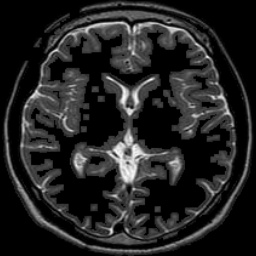

1/1 [==============================] - 7s 7s/step
Predição para N_207.jpg: normal


In [11]:
from google.colab import files
from IPython.display import Image, display
import os

uploaded = files.upload()

for filename in uploaded.keys():
    img_path = '/content/' + filename
    display(Image(img_path))  # Exibir a imagem carregada
    img_array = preprocess_image(img_path)
    prediction = predict_tumor(NeuroScanAI_model, img_array)
    print(f'Predição para {filename}: {prediction}')
